### Implementing a Linear regression model for a more complex dataset

In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"D:\data_for_analysis\head_brain\headbrain.csv")
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [5]:
df.isna().sum() ## dataset looks clean

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [8]:
df.columns = ["Gender","Age_Range","Head_Size(cm^3)","Brain_Weight(grams)"]
df

,Gender,Age_Range,Head_Size(cm^3),Brain_Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [9]:
## This is simply a test and should not be considered since no splitting of dataset into train and test value has occurred. This is performed later in the code

reg = linear_model.LinearRegression()
reg.fit(df[["Gender","Age_Range","Head_Size(cm^3)"]], df["Brain_Weight(grams)"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
reg.coef_

array([-22.5432537 , -23.96844543,   0.24421175])

In [11]:
reg.intercept_

464.5628108859082

In [12]:

reg.predict([[2,2,3391]]) ## Just a test, this value should be discarded since its a value used directly from the training set, leading to overfitting

array([1199.66145395])

In [15]:
train, test = train_test_split(df, test_size=0.2)

In [17]:
reg2 = linear_model.LinearRegression()
reg2.fit(train[["Gender", "Age_Range", "Head_Size(cm^3)"]], train["Brain_Weight(grams)"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
reg2.coef_

array([-25.50446904, -24.73721272,   0.24793825])

In [19]:
reg2.intercept_

456.47601823620687

In [21]:
pred = []
true = test["Brain_Weight(grams)"].values
true

array([1270, 1350, 1350, 1306, 1220, 1160, 1235, 1355, 1250, 1230, 1270,
       1350, 1300, 1360, 1280, 1170, 1560, 1275, 1320, 1380, 1420, 1060,
       1318, 1270, 1104, 1175, 1130, 1200, 1570, 1408, 1297, 1240, 1224,
       1210, 1260, 1635, 1310, 1220, 1076, 1340, 1282, 1310, 1340, 1380,
       1215, 1310, 1241, 1165], dtype=int64)

In [27]:
test["Predictions"] = test[["Gender","Age_Range","Head_Size(cm^3)"]].apply(lambda x: reg2.predict([x])[0],axis=1)

C:\Users\Abhishek\Anaconda_3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
test

,Gender,Age_Range,Head_Size(cm^3),Brain_Weight(grams),Predictions
140,2,1,3572,1270,1266.365291
51,1,1,3793,1350,1346.664113
40,1,1,3962,1350,1388.565677
124,1,2,4051,1306,1385.894968
197,2,2,3344,1220,1185.098158
184,2,1,3479,1160,1243.307034
157,2,1,3707,1235,1299.836954
8,1,1,3613,1355,1302.035228
166,2,1,3248,1250,1186.033298
92,1,2,3662,1230,1289.446990


In [30]:
from sklearn.metrics import mean_squared_error
import math
error = math.sqrt(mean_squared_error(test["Brain_Weight(grams)"], test["Predictions"]))
error ## Root Mean Square Error

71.7160610056038

Text(0, 0.5, 'Predicted')

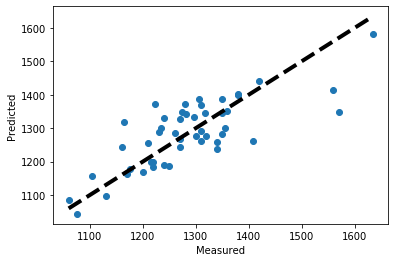

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(test["Brain_Weight(grams)"], test["Predictions"])
ax.plot([test["Brain_Weight(grams)"].min(), test["Brain_Weight(grams)"].max()], [test["Brain_Weight(grams)"].min(), test["Brain_Weight(grams)"].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
